In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
data = pd.read_csv("Shopping_Mall_Customer_Segmentation_Data.csv")  # Replace with your dataset path

# View the first few rows of the dataset
print(data.head())

                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  


In [6]:
# Check for missing values
print(data.isnull().sum())

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


In [8]:
# Drop irrelevant columns (e.g., Customer ID)
data = data.drop(['Customer ID'], axis=1)

In [10]:
# Select the features for clustering (e.g., Age, Annual Income, Spending Score)
X = data[['Age', 'Annual Income', 'Spending Score']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

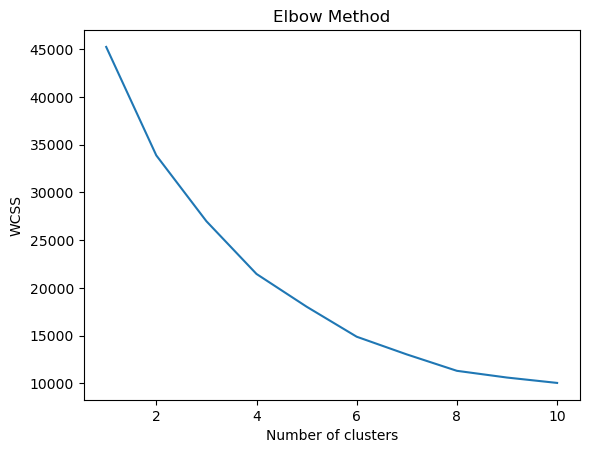

In [11]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

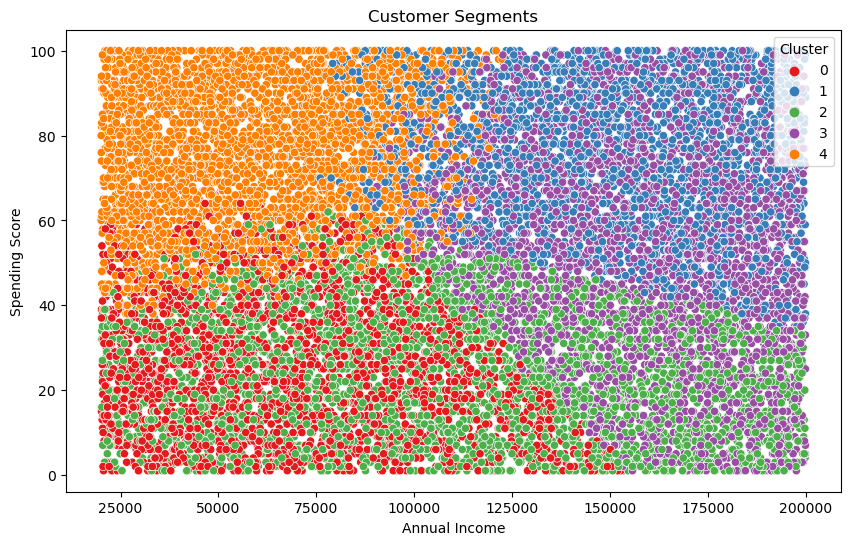

In [14]:
# 2D plot for visualizing clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income'], y=data['Spending Score'], 
                hue=data['Cluster'], palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

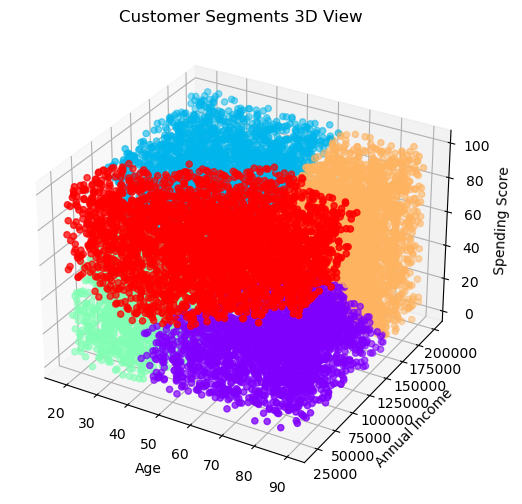

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income'], data['Spending Score'], 
           c=data['Cluster'], cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments 3D View')
plt.show()